# header
This is a project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("US_youtube_trending_data.csv")
data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199185,drvPVTMQ8fU,Film Theory: Mario is IMMORTAL! (Super Mario M...,2023-04-23T17:05:07Z,UC3sznuotAs2ohg_U__Jzj_Q,The Film Theorists,1,2023-04-30T00:00:00Z,Mario|mario movie|super mario bros|super mario...,2475971,109521,0,6203,https://i.ytimg.com/vi/drvPVTMQ8fU/default.jpg,False,False,*SUBSCRIBE to Film Theory!*Don't miss a Film T...
199186,0nMgqZtksyc,Aaron Rodgers Has OFFICIALLY Been Traded To Th...,2023-04-24T20:40:51Z,UCxcTeAKWJca6XyJ37_ZoKIQ,The Pat McAfee Show,17,2023-04-30T00:00:00Z,pat mcafee|podcast|sports|nfl|ncaa|football|fo...,519306,10084,0,1306,https://i.ytimg.com/vi/0nMgqZtksyc/default.jpg,False,False,This is a conversation from The Pat McAfee Sho...
199187,X0dLL4uYivE,My First Game In Japan Broke Records,2023-04-23T15:15:01Z,UCczKsS4gTjJzU5zayrNnwEA,Trevor Bauer,17,2023-04-30T00:00:00Z,[None],1100305,28114,0,1328,https://i.ytimg.com/vi/X0dLL4uYivE/default.jpg,False,False,Get BauerOutage Merch from here 👉 https://www....
199188,oWc6RY8U6KQ,MY DAUGHTER'S DREAM VACATION in Alphabetical O...,2023-04-22T14:00:09Z,UCKaCalz5N5ienIbfPzEbYuA,Jordan Matter,24,2023-04-30T00:00:00Z,jordan matter|salish matter|hudson matter|nali...,7368531,105583,0,72654,https://i.ytimg.com/vi/oWc6RY8U6KQ/default.jpg,False,False,My daughter Salish and son Hudson attempt thei...


In [3]:
data.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

Currently the dates are of type object, which will cause issues when plotting. Let's turn them into datetimes.

In [4]:
data["publishedAt"] = pd.to_datetime(data["publishedAt"])
data["trending_date"] = pd.to_datetime(data["trending_date"])

In [ ]:
print(data["publishedAt"].dtype)
print(data["trending_date"].dtype)

# Data visualization
Let's make some preliminary plots of viewcounts, likes, and dislikes.

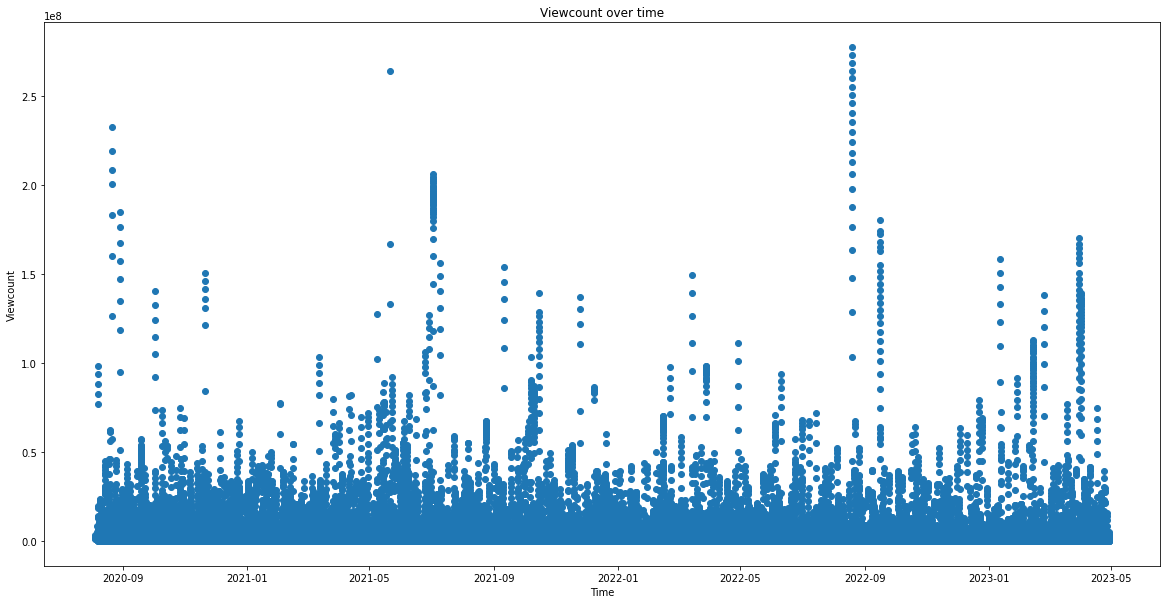

In [44]:
plt.figure(figsize=(20,10))
plot = plt.scatter(np.array(data["publishedAt"]), np.array(data["view_count"]))
plt.ylabel("Viewcount")
plt.xlabel("Time")
plt.title("Viewcount over time")
plt.show()

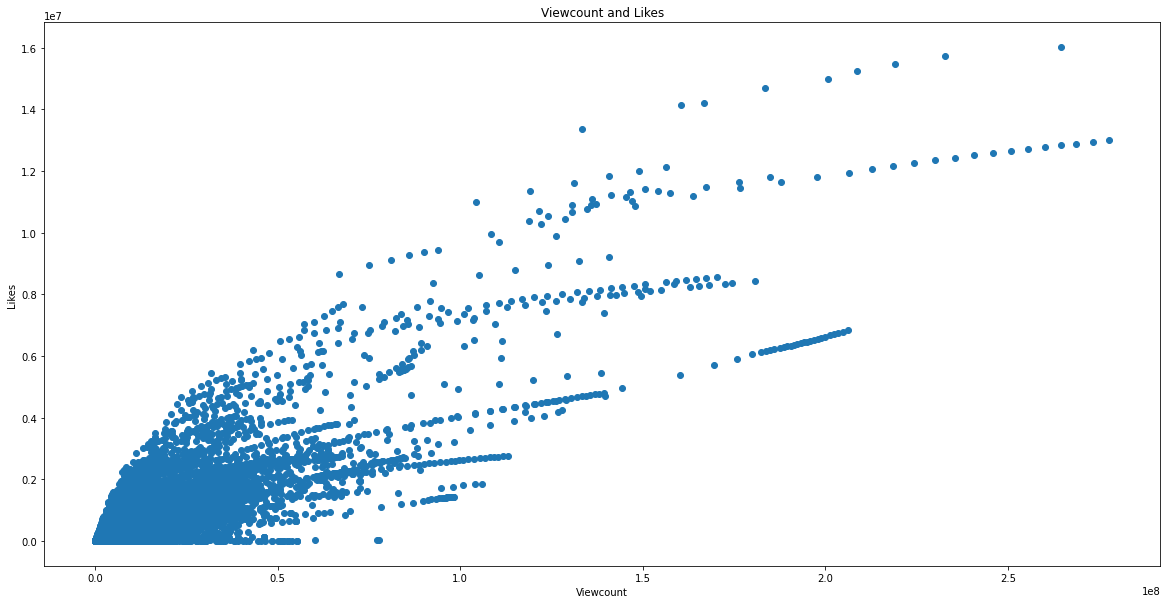

In [11]:
plt.figure(figsize=(20,10))
plot = plt.scatter(np.array(data["view_count"]), np.array(data["likes"]))
plt.xlabel("Viewcount")
plt.ylabel("Likes")
plt.title("Viewcount and Likes")
plt.show()

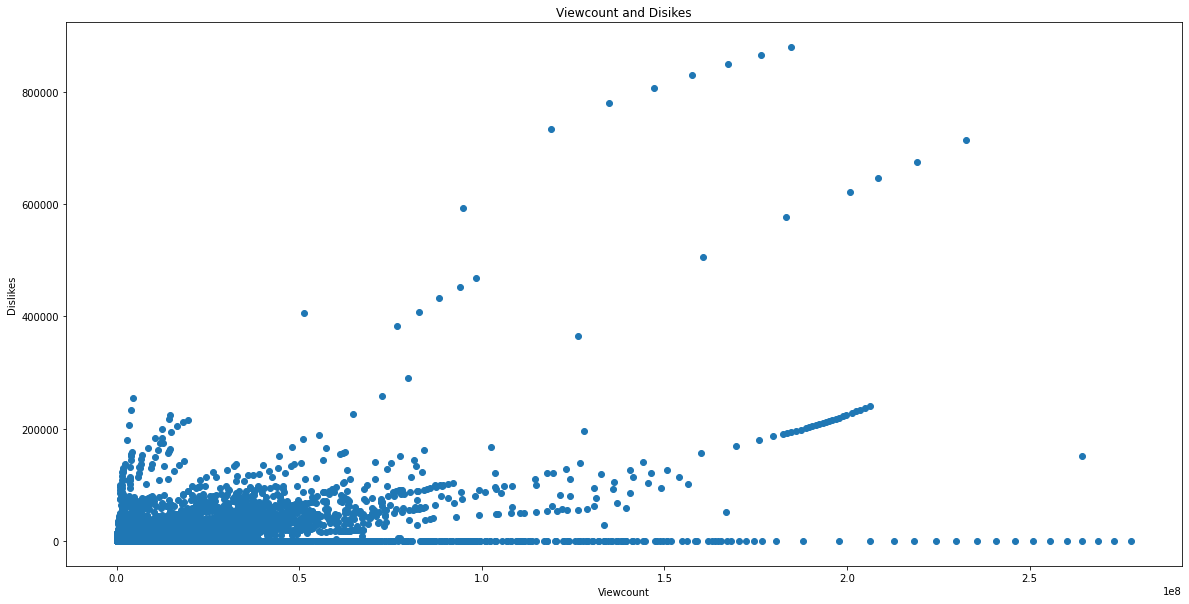

In [10]:
plt.figure(figsize=(20,10))
plot = plt.scatter(np.array(data["view_count"]), np.array(data["dislikes"]))
plt.xlabel("Viewcount")
plt.ylabel("Dislikes")
plt.title("Viewcount and Disikes")
plt.show()

There are lines in the data, where some time points seem to have an abnormally high number of data points with high views. These data points also seem to be linked to each other in the form of lines. Why is that? Let's try to see what the top videos look like to find out more.

In [9]:
sort = data.sort_values("view_count", ascending = False)
sort.head(50)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-10 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152568,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-09 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,273162966,12937252,0,3516745,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152365,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-08 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,268758295,12882841,0,3504692,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152175,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-07 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,264459017,12829059,0,3491132,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21 03:46:13+00:00,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30 00:00:00+00:00,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
151968,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-06 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,260126694,12773474,0,3479717,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
151773,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-05 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,255524865,12715882,0,3466961,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
151570,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-04 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,250963177,12653408,0,3450920,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
151372,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-03 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,245994768,12577694,0,3438048,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
151167,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-02 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,240757307,12502699,0,3424014,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...


In [ ]:
# insert code here, im gonna do some stuff with groupby.